In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris[0:10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris_count = pd.crosstab(index=iris["Species"],columns="count") 
iris_count

col_0,count
Species,
setosa,50
versicolor,50
virginica,50


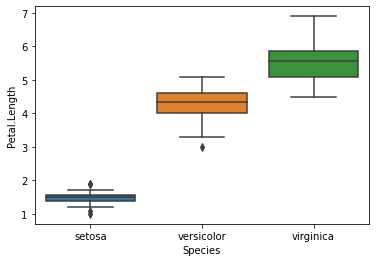

In [6]:
sns.boxplot(x="Species",y="Petal.Length",data=iris)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",size=3);
plt.show()

C:\Users\Vivek Tangudu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.47223015873017,
 39.03998724608726,
 34.29971212121213,
 30.06311061745273,
 28.271721728563833,
 26.09432474054042]

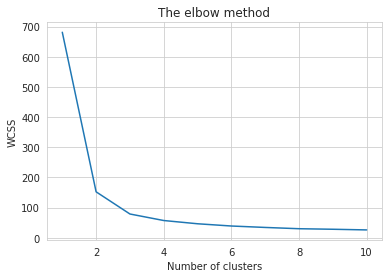

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 25, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

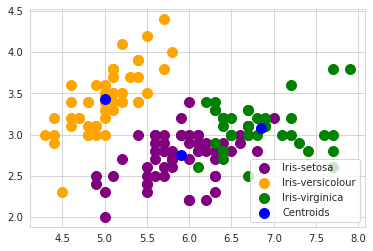

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()

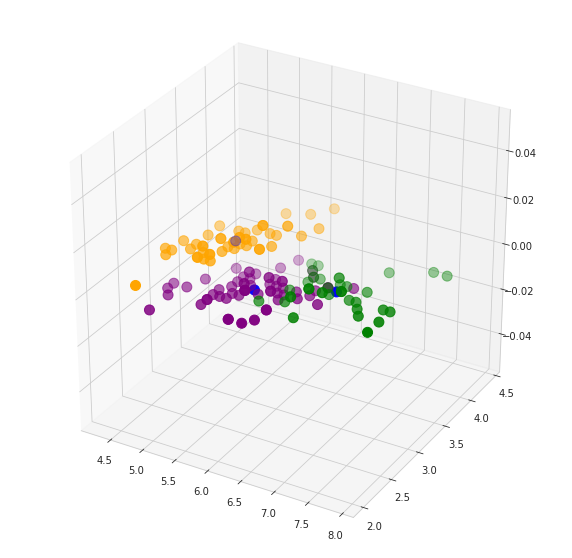

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')
plt.show()

In [ ]:
y = iris.iloc[:, [4]].values

In [ ]:
y

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
    

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(x, y)